<div align="center"><a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/Automatizacion/Extras/edicion_imagenes.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg'/> </a> 

# Edición de Imágenes con Python

Pillow es un módulo para interactuar con archivos de imagen. Éste posee muchas funciones que facilitan por ejemplo la edición, los recortes y los cambios de tamaño. Con el poder de manipular imágenes de la misma manera en la que se haría con otro software como Microsoft Paint o Adobe Photoshop, Python puede editar automáticamente cientas o miles de imágenes con facilidad.

## Color

#### Función *ImageColor.getcolor()*: 

Usualmente los colores se codifican en una tupla RGBA de cuatro elementos: Red, Green, Blue y Alpha. Los tres primeros representan el grado de cada uno de los colores rojo, verde y azul, mientras que Alpha indica la transparencia. Cada parámetro tiene un mínimo de 0 y un máximo de 255. Pillow nos brinda una función que nos puede ayudar a identificar el código RGBA de un color a partir de su nombre en inglés:

In [1]:
from PIL import ImageColor

In [2]:
print(ImageColor.getcolor('red', 'RGBA'))
print(ImageColor.getcolor('RED', 'RGBA'))
print(ImageColor.getcolor('Black', 'RGBA'))
print(ImageColor.getcolor('chocolate', 'RGBA'))
print(ImageColor.getcolor('CornflowerBlue', 'RGBA'))

(255, 0, 0, 255)
(255, 0, 0, 255)
(0, 0, 0, 255)
(210, 105, 30, 255)
(100, 149, 237, 255)


#Abrir imágenes

Para manipular una imagen con Pillow, primero necesitamos abrirla mediante la función *Image.open()*

In [3]:
!wget https://ihum.ai/static/logos/ISOTIPO.png -O logo.png #Traemos el logo de Humai desde la página oficial :)

--2021-11-10 17:32:48--  https://ihum.ai/static/logos/ISOTIPO.png
Resolving ihum.ai (ihum.ai)... 18.190.92.144
Connecting to ihum.ai (ihum.ai)|18.190.92.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17855 (17K) [image/png]
Saving to: ‘logo.png’

logo.png            100%[===================>]  17,44K  --.-KB/s    in 0s      

2021-11-10 17:32:49 (613 MB/s) - ‘logo.png’ saved [17855/17855]



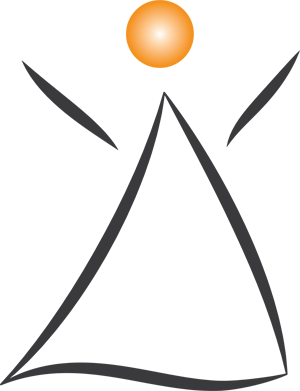

In [4]:
from PIL import Image

logo = Image.open('logo.png')

logo

Todas las rotaciones, cambios de tamaño, cortes, dibujos y otras tareas vamos a hacerlas llamando métodos de este objeto Image.

In [5]:
type(logo)

PIL.PngImagePlugin.PngImageFile

#Tamaño

Las dimensiones de una imagen se odenan a partir de una *Box tuple* de cuatro coordenadas: 

* Left: La coordenada *x* del borde izquierdo de la imagen.

* Top: La coordenada *y* del borde superior de la imagen.

* Right: La coordenada *x* de un pixel a la derecha del borde derecho de la imagen. Este entero debe ser mayor a Left.

* Bottom: La coordenada *y* de un pixel más abajo del borde inferior de la imagen. Este entero debe ser mayor a Top.

(Observemos que los enteros de Left y Top están incluidos, mientras que los de Right y Bottom están excluidos)

## Métodos de manipulación

Con *size* podemos obtener el tamaño de nuestra imagenen una tupla de dos elementos:

In [6]:
logo.size

(300, 391)

Separamos la tupla en ancho y alto:

In [7]:
ancho, alto = logo.size

print(ancho)
print(alto)

300
391


También podemos obtener información como el nombre del archivo de la imagen...

In [8]:
logo.filename

'logo.png'

...el formato...

In [9]:
logo.format

'PNG'

...O incluso la descripción del formato.

In [10]:
logo.format_description

'Portable network graphics'

Con el método *save* guardamos una copia, pasándole como parámetro un string que especifique el nombre del archivo y el formato deseado:

In [11]:
logo.save('muñequito_humai.png')

Con *crop()* podemos recortar un rectángulo específico dentro de la imagen:

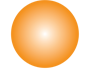

In [12]:
recorte = logo.crop((115, 0, 205, 70))

recorte

También podemos guardar el recorte realizado dentro de un archivo:

In [13]:
recorte.save('recorte.png')

El método *copy()* nos permite generar un nuevo objeto *Image* igual a aquél desde el cual fue llamado. Esto resulta ventajoso si queremos manipular una imagen pero al mismo tiempo mantener una versión intacta de la misma: 

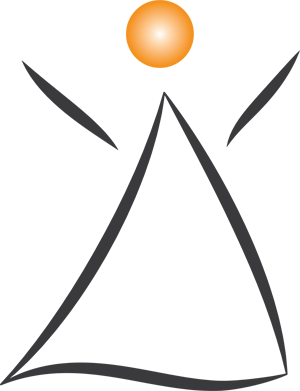

In [14]:
logo2 = logo.copy()

logo2

El método *paste()* nos permite pegar una imagen sobre otra. En este caso vamos a superponer el recorte que hicimos sobre nuestra copia:

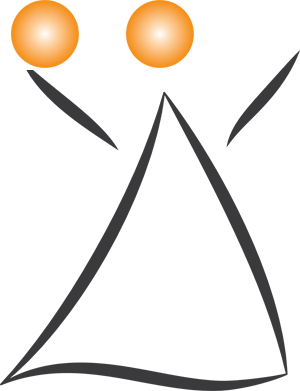

In [15]:
logo2.paste(recorte, (0, 0))

logo2 

¡¡¡Ahora el logo de Humai tiene dos pelotitas!!! Podemos agregarle una más del otro lado, modificando el parámetro que determina la coordenada superior izquierda de la imagen a pegar:

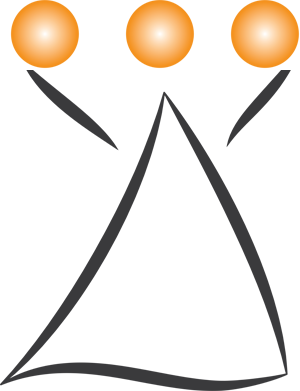

In [16]:
logo2.paste(recorte, (220, 0))

logo2 

Nota: Ni el método *copy()* ni el método *paste()* utilizan el portapapeles de nuestra computadora.

Otra cosa que podemos hacer es pegar nuestro recorte de manera que recubra toda la imagen mediante un bucle anidado dentro de otro, de la siguiente manera:

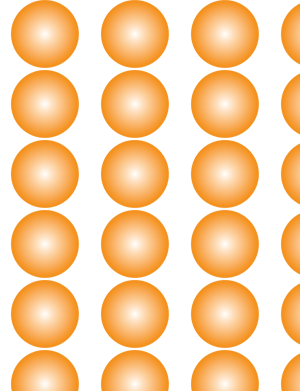

In [17]:
ancho_copia, alto_copia = logo2.size #Separamos ancho y alto de ambos objetos.
ancho_recorte, alto_recorte = recorte.size

for left in range(0, ancho_copia, ancho_recorte): #Para un rango del ancho de la imagen, con un intervalo del ancho del recorte...
    for top in range(0, alto_copia, alto_recorte): #...y a su vez para un rango del alto de la imagen, con un intervalo del alto del recorte...
        logo2.paste(recorte, (left, top)) #...pegar el recorte.

logo2

Veamos algunos ejemplos un poco más complejos

In [18]:
!wget https://codersera.com/blog/wp-content/uploads/2021/06/Beginners-Guide-To-Python.jpeg -O img.jpeg

--2021-11-10 17:32:49--  https://codersera.com/blog/wp-content/uploads/2021/06/Beginners-Guide-To-Python.jpeg
Resolving codersera.com (codersera.com)... 172.67.149.220, 104.21.29.227, 2606:4700:3034::ac43:95dc, ...
Connecting to codersera.com (codersera.com)|172.67.149.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘img.jpeg’

img.jpeg                [ <=>                ]  17,16K  --.-KB/s    in 0,009s  

2021-11-10 17:32:50 (1,80 MB/s) - ‘img.jpeg’ saved [17574]



In [19]:
from PIL import ImageDraw, ImageFont

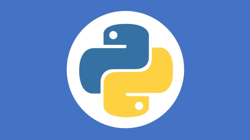

In [20]:
# Leemos la imagen
py = Image.open('img.jpeg').convert('RGBA')

# la achicamos
py.thumbnail((250, 250))
py

In [23]:
def storify(image, color=None, coloroff=1, ratio=16 / 9):
    """Función para llevar una imagen a una proporcion dada, completando con el color dominante.
    image:= Imagen PIL
    color:= Color a usar, si no se quiere el dominante,
    coloroff := offset del color para no tomar el más predominante,
    ratio := proporción a la que llevar la imagen
    """
    
    old_size = image.size
    # calculamos las nuevas dimensiones    
    max_dimension, min_dimension = max(old_size), min(old_size)
    desired_size = (max_dimension, int(max_dimension * ratio))
    # coordenadas medias para pegar la imagen original
    x_mid = int(desired_size[0] / 2 - old_size[0] / 2)
    y_mid = int(desired_size[1] / 2 - old_size[1] / 2)
    position = (x_mid, y_mid)

    # si el color es None, buscamos el color más presente
    image = image.convert("RGBA")
    if color is None:
        pixels = image.getcolors(image.width * image.height)  # get colors devuelve la cantidad de pixeles de cada color RGB
        sorted_pixels = sorted(pixels, key=lambda t: t[0])
        color = sorted_pixels[-coloroff][1][:-1]
    # creamos una nueva imagen de la dimensión deseada y pegamos la original en el centro
    blank_image = Image.new("RGB", desired_size, color=color)
    blank_image.paste(image, position, image)

    return blank_image, color, position

In [24]:
img, color, pos = storify(py, ratio=1)

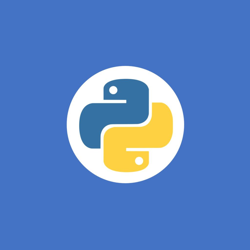

In [25]:
img

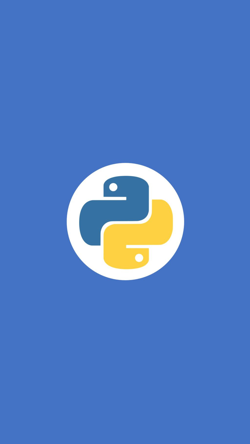

In [26]:
img, color, pos = storify(py, color=None, ratio=16/9)
img

In [36]:
!wget -nc https://unket.s3.sa-east-1.amazonaws.com/static/Roboto-Regular.ttf -O font.ttf

--2021-11-10 17:37:52--  https://unket.s3.sa-east-1.amazonaws.com/static/Roboto-Regular.ttf
Resolving unket.s3.sa-east-1.amazonaws.com (unket.s3.sa-east-1.amazonaws.com)... 52.95.163.55
Connecting to unket.s3.sa-east-1.amazonaws.com (unket.s3.sa-east-1.amazonaws.com)|52.95.163.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168260 (164K) [binary/octet-stream]
Saving to: ‘font.ttf’

font.ttf            100%[===================>] 164,32K   732KB/s    in 0,2s    

2021-11-10 17:37:52 (732 KB/s) - ‘font.ttf’ saved [168260/168260]



In [37]:
def add_text_center(
    img,
    txt,
    y_offset=0,
    x_offset=0,
    font_size=50,
    color="black",
    font_ttf="font.ttf",
):
    """Función para pegar un texto en una imagen PIL.
    Por default, el texto se pega en el centro, con x e y offset se puede modificar. 
    """
    
    draw = ImageDraw.Draw(img)
    # leemos la tipografía de un archivo ttf
    font = ImageFont.truetype(font_ttf, int(font_size))
    # vemos el tamaño resultante del texto para centrarlo
    size = font.getsize(txt)
     
    width, height = img.size
    text_x, text_y = size
    
    # por default el texto se centra, los offsets nos permiten correrlo del centro
    x = (width - text_x) / 2 + x_offset
    y = (height - text_y) / 2 + y_offset
    draw.text((x, y), txt, font=font, fill=color)
    
    return img

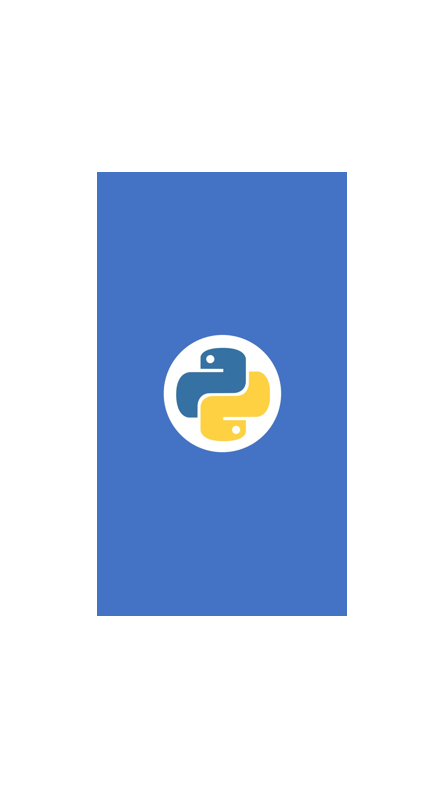

In [28]:
img, color, pos = storify(img, color='white')
img

In [31]:
for i in range(0, 100, 10):
    img = add_text_center(img, 'Automatización con Python', 
                          font_size=30 - (i/10), 
                          y_offset=-img.size[1]*0.4 - i, 
                          color=(0+i*5, 0+i*5, 0+i*5))

In [32]:
logo = logo.convert('RGBA')
img = img.convert('RGBA')

In [33]:
logo.thumbnail((100, 100))

In [34]:
img.alpha_composite(logo, (180, 650))

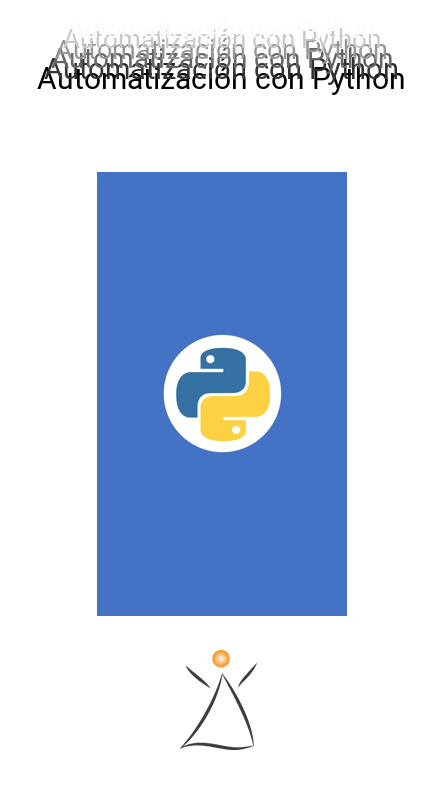

In [35]:
img